# Clase Atrasada

# Repaso

Para esta clase no fui :c, estaba en La Serena e igual valio la pena jasjasj.

Se ha estado mezclado el area de la econometria y el machine learning.

## Econometria

Clasicamente, NO separa los datos en test y train, el modelo se mide segun diversas metricas: R2, test t, test F, verosimilitud, etc. Hay pruebas de hipotesis

## Machine Learning

Separa los datos en test y train! No hay pruebas de hipotesis. Hay diversas metricas para saber si un modelo de Machine Learning es bueno o no (R2, Mean Squared Error, Mean Absolute Error, etc)

- Aqui hay dos fases: Entrenarlo y testearlo

Los modelos pueden servir para predecir cosas!

Es mejor tener un modelo parsimonioso! O sea, que sea un modelo que se explique con poquitas variables y buenas.

# Predicciones

Recordemos que todos los modelos que estabamos haciendo eran para predecir un numero (cantidad de salario, cantidad de precio de una casa, etc). Sin embargo, como predigo si algo va a ser rojo, azul, etc. Como predigo una clasificacion? Para eso es esta clases

# Clasificacion

- Estas predicciones responden a las preguntas: "Este video es apto para ser visto por ninos? Si/No"; "Este cliente va a pagar o no va a pagar? Si/No", etc. No responde a predecir numeros

- A veces se quiere minimizar equivocarse en una respuesta mas que otra (Ej: "Este video es apto para un nino?" Prefiero inflar la clasificacion de videos NO aptos para ninos, a pesar de que estos realmente si sean aptos para ninos. Esto, porque se evita clasificar un video verdaderamente NO apto para un nino como algo que si es apto para ninnos)

- Se pueden hacer modelos para mas de 2 clasificaciones (Si/No)


# Clasificacion desde la Econometria

- El vector objetivo representa un atributo discreto (Azul, Rojo - 1, 0 - etc)

- Es de aprendizaje supervisado, o sea, que se quiere predecir una variable objetivo a traves de variables independientes

- Aprendizaje no supervisado: No intenta predecir una variable dependiente, si no que quiere agrupar los datos que se tienen (Por ej: PCA/Clustering/etc)

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('wells.csv').drop(columns='index')

In [9]:
# En este caso se esta viendo si una persona se cambio de pozo de agua
# con arsenico o no.
df

,y,dist100,arsenic,educ4,assoc
0,1,0.16826,2.36,0.00,0
1,1,0.47322,0.71,0.00,0
2,0,0.20967,2.07,2.50,0
3,1,0.21486,1.15,3.00,0
4,1,0.40874,1.10,3.50,1
...,...,...,...,...,...
3015,0,0.19347,0.52,1.25,1
3016,0,0.21386,1.08,0.75,1
3017,0,0.07708,0.51,1.00,0
3018,0,0.22842,0.64,0.75,0


## Modelo de Probabilidad Lineal

Una de las primeras formas de responder al problema de clasificacion es con el modelo de probabilidad lineal. Este modelo predice la probabilidad de que ocurra un suceso (en este caso, la probabilidad de que una persona se cambie de pozo), dependiendo de diversas variables.

y = n + mx + e

Por lo tanto, las variables estarian afectando la probabilidad de que algo ocurra o no. Al ser un modelo lineal, es igual a lo que ya habiamos hecho

Aqui estamos prediciendo la probabilidad de que una familia se cambie de pozo (y) con respecto a la distancia que tiene de un pozo (dist100).

In [12]:
ml_ols = smf.ols('y ~ dist100', data=df).fit()

In [14]:
ml_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     42.57
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           7.95e-11
Time:                        00:15:02   Log-Likelihood:                -2136.2
No. Observations:                3020   AIC:                             4276.
Df Residuals:                    3018   BIC:                             4288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6484      0.014     45.194      0.000       0.620       0.677
dist100       -0.1515      0.023     -6.525      0.000      -0.197      -0.106
==============================================================================
Omnibus:                    11769.028   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.263
Skew:                          -0.305   Prob(JB):                    1.40e-104
Kurtosis:                       1.148   Cond. No.                         3.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# De las metricas anteriores podemos decir que cuando una persona
# tiene 0 metros de distancia de un pozo mejor, entonces tiene un 65% de probabilidades
# de cambiarse de pozo. Por otro lado, cuando se aleja 100 metros de un pozo seguro, entonces la
# probabilidad de cambiarse de pozo baja en 15% aprox

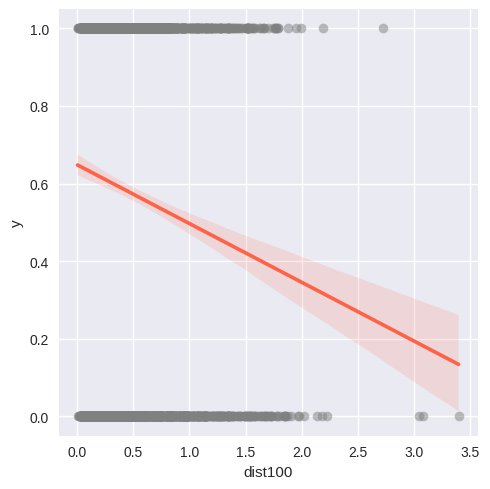

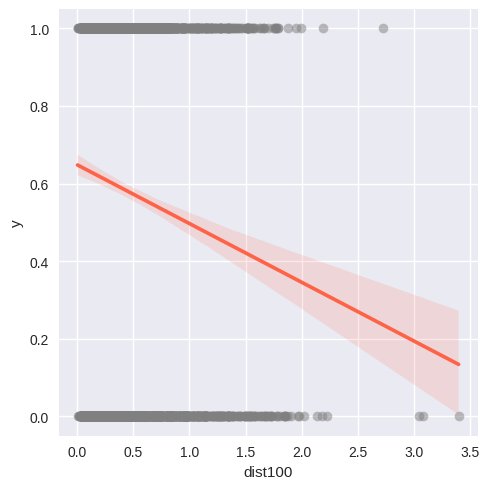

In [17]:
sns.lmplot('dist100', 'y', df,
           line_kws={'color': 'tomato'},
           scatter_kws= {'color': 'grey',
                         'alpha': .5})
plt.show()